# Generate group-visualization figures for PPF symmetry paper

J. Gibson, initiated 2023-11-08, last edit ...

Generate and investigate a few Gppf subgroups for doubly-periodic domains where the shifts are 1/3 box, 1/4 box, 1/5 box, etc. 

In [1]:
using Plots
using Revise
using LaTeXStrings

includet("channelgroups-rational.jl")

using .ChannelGroups

In [2]:
"""
    plotgroup(G::Group, quadrants::Bool)

plot s^n on [0,1] x [0,1] until it reaches s^n = identity
plot periodically on four quadrants (better for visualization)
"""
function plotgroup(G::Group, filename="", offset=:false, ms=0)
    
    N = length(G)
    x = zeros(N)
    z = zeros(N)
    shapes = fill(:circ, N)
    colors = fill(:blue, N)
    ds = 0.025
    
    # color,shape code for reflection portion of symmetry, {id, sy, sz, syz}
    # id: blue circle, sy: red square, sz: green triangle, syz: purple diamond
    symbolmap = Dict((1,1)=>(:blue, :circ), (-1,1)=>(:red, :utriangle), 
        (1,-1)=>(:green, :dtriangle), (-1,-1)=>(:magenta, :diamond))
    
    # map from dark shades to light
    #lightermap = Dict(:green=>:lightgreen, :blue=>:lightblue, :red=>:pink, :purple=>:magenta)
    lightermap = Dict(:green=>:white, :blue=>:white, :red=>:white, :cyan=>:white, :magenta=>:white)
    # for each G[n] = s tau(a,b) where s in {id, sy, sz, syz},
    # save a,b in x,z and color/shape code in colors, shapes
    for n = 1:N
        g = G[n]
        x[n] = Float64(g.ax)
        z[n] = Float64(g.az)
        colors[n]
        # color,shape code for reflection portion of symmetry, {id, sy, sz, syz}
        # id: blue circle, sy: red square, sz: green triangle, syz: purple diamond
        if  g.sy == -1 && offset
            x[n] += ds
        end
        if g.sz == -1 && offset
            z[n] += ds
        end
        colors[n], shapes[n] = symbolmap[(g.sy, g.sz)]
        #@show shapes[n]
        #@show colors[n]
    end
    
    # duplicate symbols plotted on x==0 and/or z==0, at x==1 and/or z==1
    # to represent the periodicity of the domain
    for n in 1:N
        if x[n] <= offset && z[n] <= offset
            push!(x, x[n] + 1.0)
            push!(z, z[n] + 1.0)
            push!(shapes, shapes[n])
            push!(colors, lightermap[colors[n]])
        end
        if x[n] <= offset 
            push!(x, x[n] + 1.0)
            push!(z, z[n])
            push!(shapes, shapes[n])
            push!(colors, lightermap[colors[n]])
        end
        if z[n] <= offset
            push!(x, x[n])
            push!(z, z[n] + 1.0)
            push!(shapes, shapes[n])
            push!(colors, lightermap[colors[n]])
                    
        end   
    end
           
    plot()
    #scatter!(x, z, color=colors, markershape=shapes, label="")
    #scatter!([0; 1; 1], [1; 1; 0], markershape=:circ, color=:white, label="")
    plot!([0; 0; 1], [1; 0; 0], ls=:solid, color=:gray, label="")
    plot!([0; 1; 1], [1; 1; 0], ls=:dash, color=:gray, label="")
    plot!(xlim=(-0.02, 1.02), ylim=(-0.02, 1.02))
    #plot!(xlim=(0.0, 1.0), ylim=(0.0, 1.0))
    if ms == 0 
        scatter!(x, z, color=colors, markershape=shapes, label="")
    else
        scatter!(x, z, color=colors, markershape=shapes, label="", markersize=ms)
    end
    
    #for xshift in [-1; 0; 1], zshift in [-1; 0; 1]
        #scatter!(x .+ xshift, z .+ zshift, color=colors, markershape=shapes, label="")
    #end
    #scatter!(x .+ 1, z, color=colors, markershape=shapes, label="")
    #scatter!(x .- 1, z .- 1, color=colors, markershape=shapes, label="")
    #scatter!(x, z .- 1, color=colors, markershape=shapes, label="")
    #scatter!(x .+ 1, z, color=colors, markershape=shapes, label="")
    #scatter!(x .+ 1, z .+ 1, color=colors, markershape=shapes, label="")
    #scatter!(x, z .+ 1, color=colors, markershape=shapes, label="")
 
    plot!(xlim=(-.04, 1.04), ylim=(-.04, 1.04))
    #plot!([-1; 1; 1; -1; -1], [-1; -1; 1; 1; -1], ls=:dash, color=:gray, label="")
    #plot!([-1; 1], [0; 0], label="", color=:gray)
    #plot!([0; 0], [-1; 1], label="", color=:gray)
    #plot!(xlabel="a", ylabel="b", aspect_ratio=1, size=size)
    
    xtick = [0; 0.25; 0.50; 0.75; 1.0]
    xmark = ["0"; ""; ""; ""; "1"]
    plot!(xlabel=L"a", ylabel=L"b", aspect_ratio=1, size=(200,200))
    plot!(xticks=(xtick,xmark), yticks=(xtick,xmark))
    plot!(framestyle=:zerolines)
    p = plot!()
    if length(filename) > 0 
        savefig(p, filename * ".pdf")
    end
    
    p
end  


plotgroup

In [3]:
# Define the key reflections and half-box shifts of the geometric channel group (no BCs or mean flow)
id = Symmetry( 1, 1, 1, 0, 0)
sx = Symmetry(-1, 1, 1, 0, 0)
sy = Symmetry( 1,-1, 1, 0, 0)
sz = Symmetry( 1, 1,-1, 0, 0)
tx = Symmetry( 1, 1, 1, 1//2, 0)
tz = Symmetry( 1, 1, 1, 0, 1//2)
tx3 = Symmetry( 1, 1, 1, 1//3, 0)
tz3 = Symmetry( 1, 1, 1, 0, 1//3)
txz = tx*tz
syz = sy*sz

# Generate the entire 16-order subgroup of PPF formed from those generators
Gpp16 = [id, sy] * [id, sz] * [id, tx] * [id, tz]

order-16 group {id, tz, tx, txz, sz, sztz, sztx, sztxz, sy, sytz, sytx, sytxz, syz, syztz, syztx, syztxz}


Ha = Symmetry[id, sztx, sytz, syztxz]
length(Ha) = 4
isminimal(Ha) = true


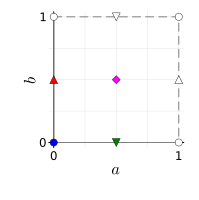

In [4]:
# example foo.A, shows sztx, tau(a,b), a = 0 or 1/2 => H minimal
Ha = generategroup(sz*tx, sy*tz)

@show Ha
@show length(Ha)
@show isminimal(Ha)
plotgroup(Ha, "sztx_sytz")

## Minimal subgroups of Gppf and their equivalence classes

In [5]:
# Gppf16 \ {tx, tz}
Gppf16 = generategroup([sy; sz; tx; tz])
S1 = [id, sy, sz, sy*sz, tx*sy, tx*sz, tx*sy*sz, tz*sy, tx*tz, tx*tz*sy]

#####################################################################
## Construct all subgroups of $G_{16}$ and assign to sets $P_n$

# Let $P_n$ be the set of order $2^{n-1}$ subgroups of $G_{16}$ 
# (all subgroups of G16, without any equivalence reduction, etc.)

# These will be $P_1, P_2, P_3, P_4, P_5$. We have $P_1 = \{\{id\}\}$ trivially. 
# $P_2$ has to be constructed manually from the elements in Gppf16 acording to
# $P_2 = \{ \{1, g\} | g \in G_{16}, g \neq 1\}. Gppf16 is order 16, and all 
# non-identity elements are 2nd-order, so $P_2$ will be order 15.  

Gbase = Gppf16

P = Vector{Vector{Group}}(undef, 5)
P[1] = [[id]]
P[2] = Vector{Group}(undef, length(Gbase))

k = 0
for i in 1:length(Gbase)
    if Gbase[i] ∉ [id; tx; tz]
        k += 1
        P[2][k] = [id; Gbase[i]]
    end
end
P[2] = sort(unique(P[2][1:k]))

# Construct remaining $P_{n+1}$s from $P_n$ inductively
for n=3:5
    Pn = Vector{Group}(undef, length(P[n-1])^2)
    k = 0
    for i in 1:length(P[n-1])
        for j in 1:length(P[n-1])
            PiPj = P[n-1][i] * P[n-1][j] 
            if length(PiPj) == 2^(n-1) && tx ∉ PiPj && tz ∉ PiPj
                k += 1
                Pn[k] = PiPj 
            end
        end
    end
    P[n] = sort(unique(Pn[1:k]))
end

#######################################################################################
## Compute equivalence classes $E_n$ for the set of order-2^{n-1} groups $Q_n$

# Let E[n] be the set of equivalence classes of the groups in Q[n].
# E.g. if Q[n] = {G1, G2, G3}, and G_1 ~ G_2 !~ G_3, then E[n] = {{G1, G2}, {G3}}$.

E = Vector{Vector{Vector{Group}}}(undef, 5)

tz4 = Symmetry(1,1,1,0,1//4)
for n = 1:5
    # Let En be a tmp for E[n]. Its max length is length(P[n]).
    En = Vector{Vector{Group}}(undef, length(P[n])) 
    
    k = 0  # number of equivalence classes found so far
    for i in 1:length(P[n])
    
        # check if P[n][i] is in a previous equivalence class, 
        #  i.e. if P[n][i] is conjugate to any previous group E2[j], j in 1:k
        Pni_conjugate = inv(tz4)*P[n][i]*tz4 
        newequivclass = true
        for j=1:k
            # if Pn[i] is conjugate to some group in En[j], it belongs in equivalence group En[j]
            if Pni_conjugate ∈ En[j]
                newequivclass = false
                push!(En[j], P[n][i])
                break
            end
        end
        if newequivclass
            k = k+1
            En[k] = [P[n][i]]
        end
    end
    E[n] = sort(En[1:k])
end

E

1-length array of equivalence classes
1 : { {id} }
9-length array of equivalence classes
1 : { {id, txz} }
2 : { {id, sz}, {id, sztz} }
3 : { {id, sztx}, {id, sztxz} }
4 : { {id, sy} }
5 : { {id, sytz} }
6 : { {id, sytx} }
7 : { {id, sytxz} }
8 : { {id, syz}, {id, syztz} }
9 : { {id, syztx}, {id, syztxz} }
12-length array of equivalence classes
1 : { {id, txz, sz, sztxz}, {id, txz, sztz, sztx} }
2 : { {id, txz, sy, sytxz} }
3 : { {id, txz, sytz, sytx} }
4 : { {id, txz, syz, syztxz}, {id, txz, syztz, syztx} }
5 : { {id, sz, sy, syz}, {id, sztz, sy, syztz} }
6 : { {id, sz, sytz, syztz}, {id, sztz, sytz, syz} }
7 : { {id, sz, sytx, syztx}, {id, sztz, sytx, syztxz} }
8 : { {id, sz, sytxz, syztxz}, {id, sztz, sytxz, syztx} }
9 : { {id, sztx, sy, syztx}, {id, sztxz, sy, syztxz} }
10 : { {id, sztx, sytz, syztxz}, {id, sztxz, sytz, syztx} }
11 : { {id, sztx, sytx, syz}, {id, sztxz, sytx, syztz} }
12 : { {id, sztx, sytxz, syztz}, {id, sztxz, sytxz, syz} }
2-length array of equivalence classes
1

## Non-half-box groups, playing around for examples

These cells produce the group visualizations used in figure 1 of Aghor, Gibson PPF symmetry paper, JFM submission 2024

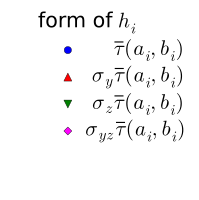

In [6]:
# (a) legend
markers = [:circ; :utriangle; :dtriangle; :diamond]
colors  = [:blue; :red;       :green;     :magenta]
#labels  = [L"\gamma_i "*" form"; L"\tau(a_i, b_i)"; L"\sigma_y \tau(a_i, b_i)"; 
#            L"\sigma_z \tau(a_i, b_i)"; L"\sigma_{yz}\tau(a_i, b_i)"]

labels  = 
    ["form of " * L"h_i"; 
    L"\overline{\tau}\,(a_i, b_i)"; 
    L"\sigma_y \overline{\tau}\,(a_i, b_i)"; 
    L"\sigma_z \overline{\tau}\,(a_i, b_i)"; 
    L"\sigma_{yz}\overline{\tau}\,(a_i, b_i)"]

plot(xlim=(-.04, 1.04), ylim=(-.04, 1.04))
plot!(aspect_ratio=1, size=(200,200))
plot!(framestyle=:none)
scatter!(0.15*ones(4), [0.7; 0.5; 0.3; 0.1] .+ 0.1, marker=markers; color=colors)
annotate!([0.3; 0.76; 0.68; 0.68; 0.66], [0.9; 0.7; 0.5; 0.3; 0.1] .+ 0.1, labels)
#plot!([0.32; 1.2], [0.85; 0.85], lc=:black, lw=0.25, label="")
plot!(grid=:false, legend=:false)

p = plot!()
savefig(p, "grouplegend.pdf")
p

Ha = Symmetry[id, sztx, sytz, syztxz]
length(Ha) = 4
isminimal(Ha) = true


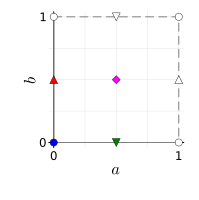

In [7]:
# example (a): <sztx, sytz> 
Ha = generategroup(sz*tx, sy*tz)

@show Ha
@show length(Ha)
@show isminimal(Ha)
plotgroup(Ha, "sztx_sytz")

In [8]:
plot!(xticks=(0:0.25:1, fill("", 5)))
plot!(yticks=(0:0.25:1, fill("", 5)))
plot!(xlabel="", ylabel="")
plot!(aspect_ratio=0.8333333333, size=(150,125))
savefig("ppf-thumbnail-a.svg")
savefig("ppf-thumbnail-a.png")

"/home/gibson/research/channelgroups/nonhalf-groups/ppf-thumbnail-a.png"

Hb = Symmetry[id, sztxz, sytz, syztx]
length(Hb) = 4
isminimal(Hb) = true
equivalent(Ha, Hb) = true


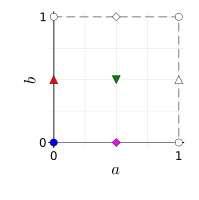

In [9]:
# example (b): Hb = <sztxz, sytz> , conjugate to (a)
Hb = generategroup(sz*txz, sy*tz)

@show Hb
@show length(Hb)
@show isminimal(Hb)
@show equivalent(Ha,Hb)
plotgroup(Hb, "sztxz_sytz")

Hc = Symmetry[id, t(1//3, 1//3), t(2//3, 2//3)]
length(Hc) = 3
isminimal(Hc) = true


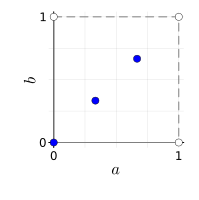

In [10]:
# example (c) simple diagonal
# Hc = <tau(1/3, 1/3)>

g = Symmetry(1,1,1, 1//3, 1//3)

Hc = generategroup(g)

@show Hc
@show length(Hc)
@show isminimal(Hc)
plotgroup(Hc, "diagonal1")


G = Symmetry[id, t(1//6, 5//6), t(1//3, 2//3), txz, t(2//3, 1//3), t(5//6, 1//6)]
length(G) = 6


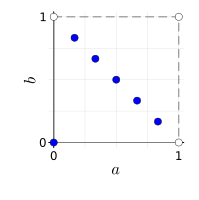

In [11]:
# example (d): reversed diagonal

g = Symmetry(1,1,1, 1//6, 5//6)

G = generategroup(g)

@show G
@show length(G)
plotgroup(G, "diagonal2")

G = Symmetry[id, t(1//5, 3//5), t(2//5, 1//5), t(3//5, 4//5), t(4//5, 2//5)]
length(G) = 5


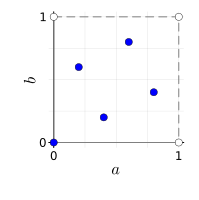

In [12]:
# example (e), tau(j/p, k/p), p prime

g = Symmetry(1,1,1, 1//5, 3//5)

G = generategroup(g)

@show G
@show length(G)
plotgroup(G, "diagonal3")

g ^ 3 = tx
G = Symmetry[id, t(0//1, 1//3), t(0//1, 2//3), tx, t(1//2, 1//3), t(1//2, 2//3)]
length(G) = 6


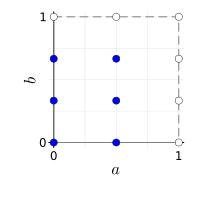

In [13]:
# example (f): m/p, n/q,  p != q

g = Symmetry(1,1,1, 1//2, 1//3)

G = generategroup(g)

@show g^3
@show G
@show length(G)
plotgroup(G, "nonminimal")

G = Symmetry[id, txz, syt(1//4, 1//4), syt(3//4, 3//4)]
length(G) = 4
isminimal(G) = true


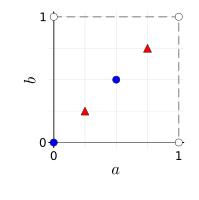

In [14]:
# example (g), shows sz, tau(a,b), a != 0 or 1/2 => H nonminimal

tab = Symmetry(1,1,1, 1//4, 1//4)
g = sy*tab
G = generategroup(g)

@show G
@show length(G)
@show isminimal(G)
plotgroup(G, "sytab")

G = Symmetry[id, t(1//5, 3//5), t(2//5, 1//5), t(3//5, 4//5), t(4//5, 2//5), syt(1//10, 3//10), syt(3//10, 9//10), sytxz, syt(7//10, 1//10), syt(9//10, 7//10)]
length(G) = 10


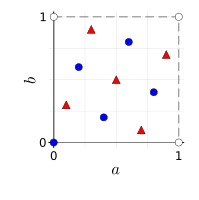

In [15]:
# example (h)

g = Symmetry(1,-1,1, 1//10, 3//10)

G = generategroup(g)

@show G
@show length(G)
plotgroup(G, "flipshift1")


G = Symmetry[id, t(1//3, 0//1), t(2//3, 0//1), szt(1//6, 4//7), szt(1//2, 4//7), szt(5//6, 4//7)]
length(G) = 6
isminimal(G) = false
g ^ 2 = t(1//5, 3//5)


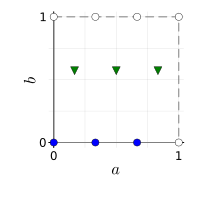

In [16]:
# example (i) 
tab = Symmetry(1,1,1, 1//6, 4//7)
h = sz*tab

G = generategroup(h)

@show G
@show length(G)
@show isminimal(G)
@show g^2
plotgroup(G, "sztab")

In [17]:
# check that z-centering works as specified in theorem 1 for Hh = <sz tau(1/10,)

h = Symmetry(1,1,-1, 1//6, 4//7)
Hhat = generategroup(h)



order-6 group {id, t(1//3, 0//1), t(2//3, 0//1), szt(1//6, 4//7), szt(1//2, 4//7), szt(5//6, 4//7)}


In [18]:
γ = Symmetry(1,1,1, 0//1, 2//7)

γ*h*inv(γ)

szt(1//6, 0//1)

G = Symmetry[id, t(1//3, 0//1), t(2//3, 0//1), szt(1//6, 0//1), sztx, szt(5//6, 0//1)]
length(G) = 6
isminimal(G) = false


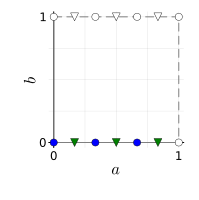

In [19]:
# unshown in paper: reduction of <sz tau(1/6, 4/7)> to z-centered equiv <sz tau(1/6,0)>  or 1/2 => H nonminimal

# recreate example i
tab = Symmetry(1,1,1, 1//6, 4//7)
h = sz*tab
G = generategroup(h)

# phase shift example i to z-centered form

γ = Symmetry(1,1,1, 0, 2//7)

G = γ*G*inv(γ)

@show G
@show length(G)
@show isminimal(G)
plotgroup(G, "sztab_zcentered")

G = Symmetry[id, sztx]
length(G) = 2
isminimal(G) = true


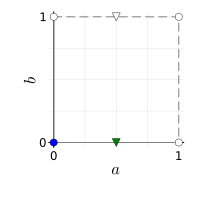

In [20]:
# example (j) reduction of <sz tau(1/6, 4/7)> to z-centered equiv <sz tau(1/6,0)>  or 1/2 => H nonminimal
tab = Symmetry(1,1,1, 1//2, 0)

G = generategroup(sz*tab)

@show G
@show length(G)
@show isminimal(G)
plotgroup(G, "sztab_reduced")

G = Symmetry[id, t(1//5, 0//1), t(2//5, 0//1), t(3//5, 0//1), t(4//5, 0//1), szt(1//10, 3//10), szt(3//10, 3//10), szt(1//2, 3//10), szt(7//10, 3//10), szt(9//10, 3//10)]
length(G) = 10


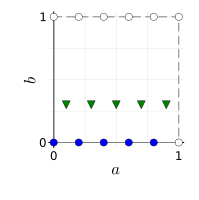

In [21]:
# example (k)

g = Symmetry(1,1,-1, 1//10, 3//10)

G = generategroup(g)

@show G
@show length(G)
plotgroup(G, "flipshift2")

## Thumbnail plot

In [22]:
function plotthumb(H)
    aspect= 5/6
    size = (180, 150)
    mm = Plots.mm
    plotgroup(H, "Htmp", false, 4)
    plot!(xticks=(0:0.25:1, fill("", 5)))
    plot!(yticks=(0:0.25:1, fill("", 5)))
    plot!(xlabel="", ylabel="", grid=:none)
    plot!(aspect_ratio=aspect, size=(size), dpi=300)
    plot!(bottom_margin=0mm, top_margin=0mm, left_margin=0mm, right_margin=0mm)
end

plotthumb (generic function with 1 method)

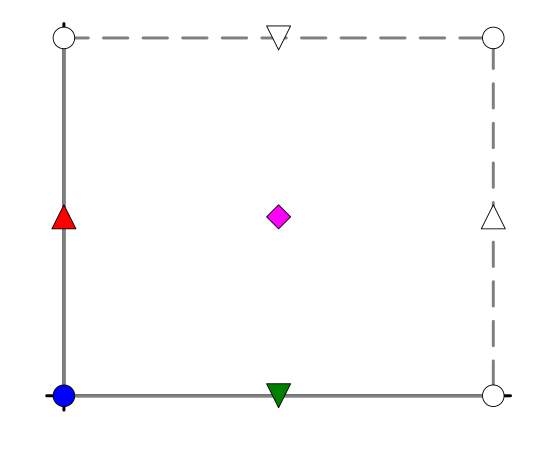

In [23]:
# example (a): <sztx, sytz> 
Ha = generategroup(sz*tx, sy*tz)
pA = plotthumb(Ha)

savefig("pA.png")
plot(pA)

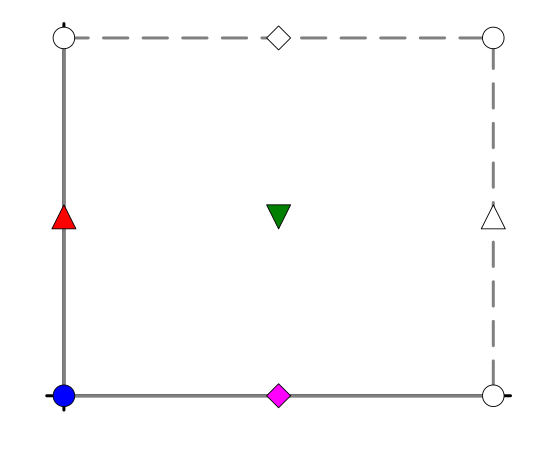

In [24]:
# example (b): Hb = <sztxz, sytz> , conjugate to (a)
Hb = generategroup(sz*txz, sy*tz)
pB = plotthumb(Hb)

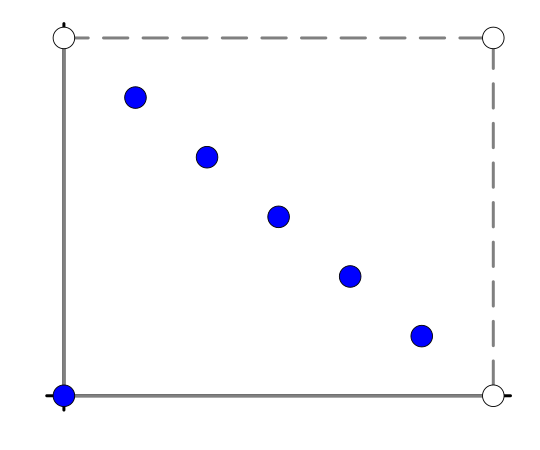

In [25]:
g = Symmetry(1,1,1, 1//6, 5//6)
Hd = generategroup(g)
pD = plotthumb(Hd)

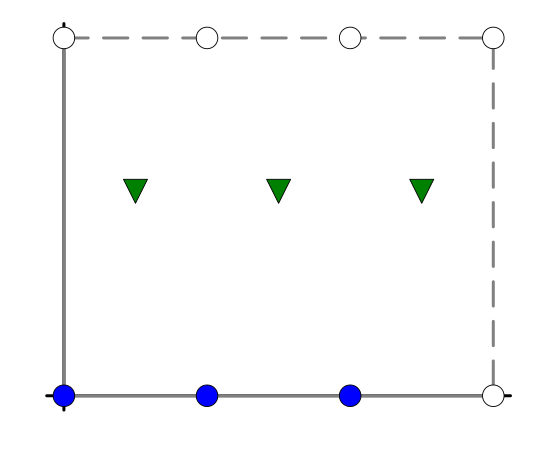

In [26]:
# example (i) 
tab = Symmetry(1,1,1, 1//6, 4//7)
h = sz*tab

Hi = generategroup(h)
pI = plotthumb(Hi)
plot!()

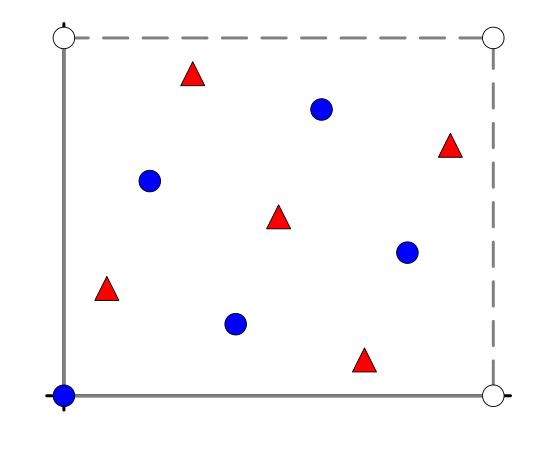

In [27]:
# example (h)

g = Symmetry(1,-1,1, 1//10, 3//10)
Hh = generategroup(g)
pH = plotthumb(Hh)

savefig("pH.png")
plot(pH)

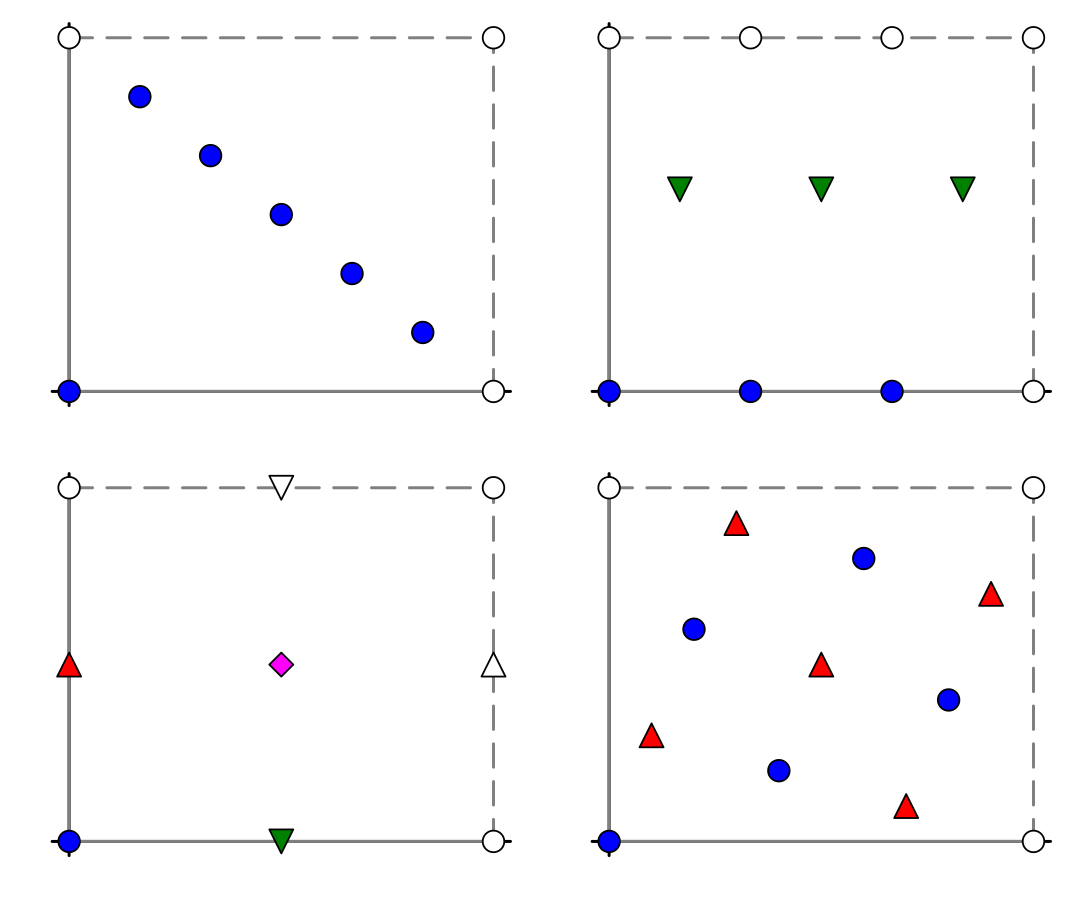

In [61]:
p = plot(pD,pI,pA,pH, layout=(2,2), size=(360,300))
savefig("thumbnail.svg")
savefig("thumbnail.png")
savefig("thumbnail.pdf")
plot(p)

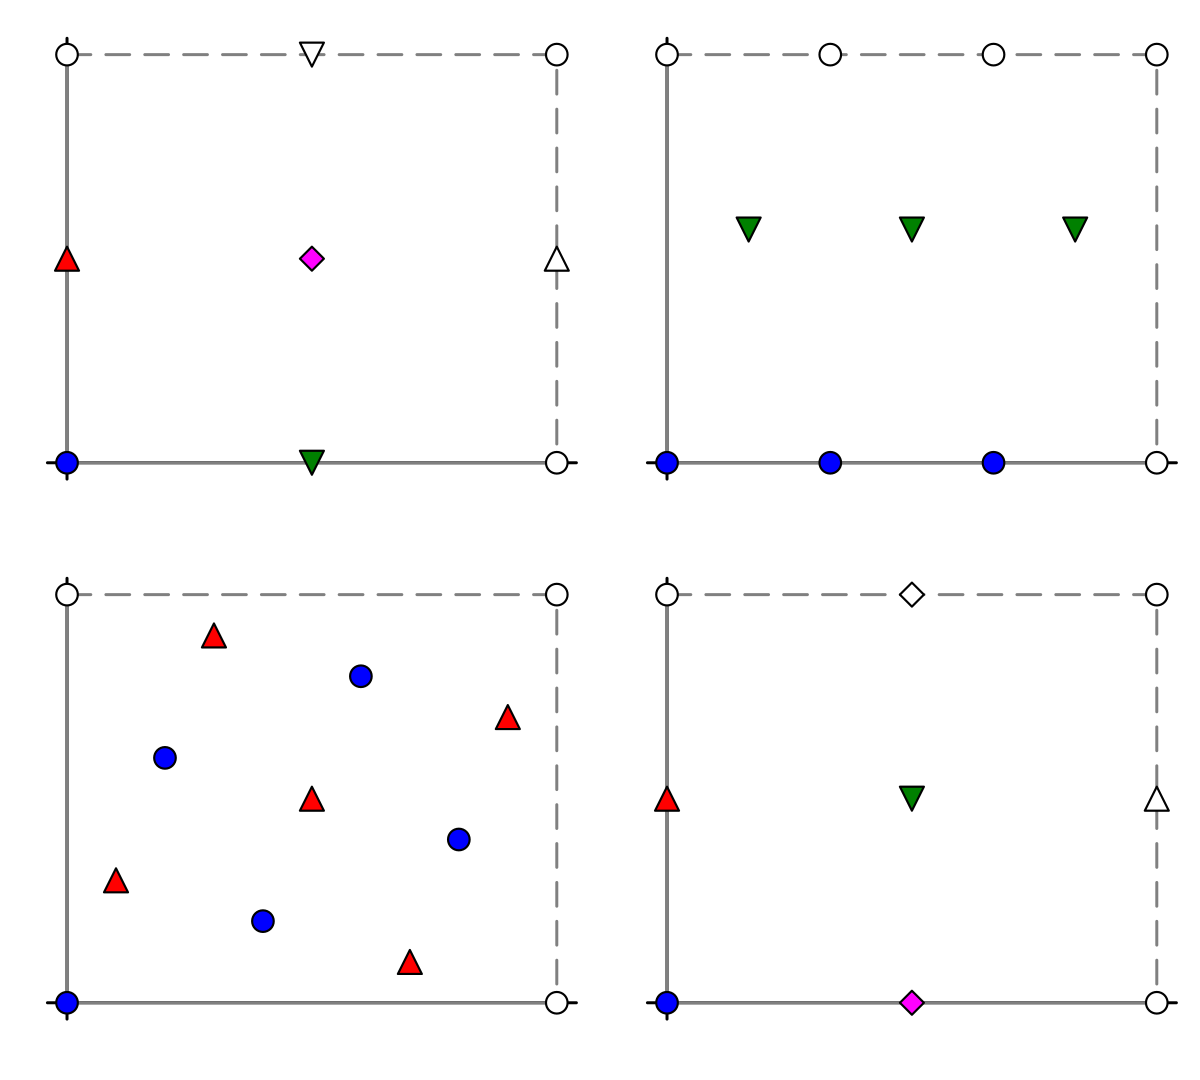

In [60]:
plot(pA,pI,pH,pB, layout=(2,2), size=(400,360))

## Test some nonminimal subgroups

Make sure the principles stated are correct!

Principle 1: Any element of Gppf with rational normalized phase shifts has finite order.

This one's obvious.

Principle 2: The subgroup $\langle \tau(j/p, k/p) \rangle$ for prime $p$ is pth order.

In [32]:
tau = Symmetry(1,1,1, 3//7, 2//7)
G = generategroup(tau)
@show length(G)

G

length(G) = 7


order-7 group {id, t(1//7, 3//7), t(2//7, 6//7), t(3//7, 2//7), t(4//7, 5//7), t(5//7, 1//7), t(6//7, 4//7)}


Principle 2: The subgroup $\langle \tau(j/m, k/n) \rangle$ for $m \neq n$, $m,n>1$ is nonminimal.

isminimal(G) = false
G = Symmetry[id, tz, t(1//4, 1//8), t(1//4, 5//8), t(1//2, 1//4), t(1//2, 3//4), t(3//4, 3//8), t(3//4, 7//8)]


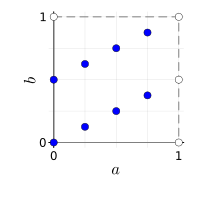

In [33]:
tau = Symmetry(1,1,1, 1//4, 1//8)
G = generategroup(tau)
@show isminimal(G)

@show G
plotgroup(G)

In [34]:
a = 0//5

@show a.den
@show a.num

a.den = 1
a.num = 0


0

g^-5 g^-5 = id ding ding ding!
g^-5 g^-4 = szt(1//10, 3//10) 
g^-5 g^-3 = t(1//5, 0//1) 
g^-5 g^-2 = szt(3//10, 3//10) 
g^-5 g^-1 = t(2//5, 0//1) 
g^-5 g^0 = szt(1//2, 3//10) 
g^-5 g^1 = t(3//5, 0//1) 
g^-5 g^2 = szt(7//10, 3//10) 
g^-5 g^3 = t(4//5, 0//1) 
g^-5 g^4 = szt(9//10, 3//10) 
g^-5 g^5 = id ding ding ding!
g^-4 g^-5 = szt(1//10, 3//10) 
g^-4 g^-4 = t(1//5, 0//1) 
g^-4 g^-3 = szt(3//10, 3//10) 
g^-4 g^-2 = t(2//5, 0//1) 
g^-4 g^-1 = szt(1//2, 3//10) 
g^-4 g^0 = t(3//5, 0//1) 
g^-4 g^1 = szt(7//10, 3//10) 
g^-4 g^2 = t(4//5, 0//1) 
g^-4 g^3 = szt(9//10, 3//10) 
g^-4 g^4 = id ding ding ding!
g^-4 g^5 = szt(1//10, 3//10) 
g^-3 g^-5 = t(1//5, 0//1) 
g^-3 g^-4 = szt(3//10, 3//10) 
g^-3 g^-3 = t(2//5, 0//1) 
g^-3 g^-2 = szt(1//2, 3//10) 
g^-3 g^-1 = t(3//5, 0//1) 
g^-3 g^0 = szt(7//10, 3//10) 
g^-3 g^1 = t(4//5, 0//1) 
g^-3 g^2 = szt(9//10, 3//10) 
g^-3 g^3 = id ding ding ding!
g^-3 g^4 = szt(1//10, 3//10) 
g^-3 g^5 = t(1//5, 0//1) 
g^-2 g^-5 = szt(3//10, 3//10) 
g^-2 g^-4 = t(2//5,

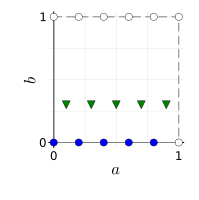

In [35]:
g = Symmetry(1,1,-1, 1//10, 3//10)
tz5 = Symmetry(1,1,1, 0, 1//5)
for j in -5:5, k in -5:5
    gjk = g^j * g^k
    winner = gjk.ax == 0//1 ? "ding ding ding!" : ""
    println("g^$j g^$k = $(gjk) $winner")
end

H = [g^k for k in 0:9]
plotgroup(H)

G = Symmetry[id, t(1//3, 2//3), t(2//3, 1//3), syt(1//6, 1//3), sytx, syt(5//6, 2//3)]
length(G) = 6


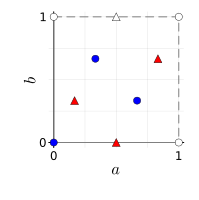

In [36]:
# example 5: a=m/p, b=n/q with distinct p,q 

g1 = Symmetry(1,1,1, 1//6, 1//3)

G = generategroup(sy*g1)

@show G
@show length(G)
plotgroup(G)

G = Symmetry[id, t(1//3, 0//1), t(2//3, 0//1), szt(1//6, 1//3), szt(1//2, 1//3), szt(5//6, 1//3)]
length(G) = 6


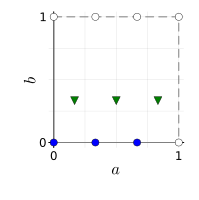

In [37]:
# example 5: a=m/p, b=n/q with distinct p,q 

g1 = Symmetry(1,1,1, 1//6, 1//3)

G = generategroup(sz*g1)

@show G
@show length(G)
plotgroup(G)

## Relative simplicity of $\sigma_y$ to $\sigma_z$

H1 = Symmetry[id, t(0//1, 1//3), t(0//1, 2//3), t(1//3, 0//1), t(1//3, 1//3), t(1//3, 2//3), t(2//3, 0//1), t(2//3, 1//3), t(2//3, 2//3), sz, szt(0//1, 1//3), szt(0//1, 2//3), szt(1//3, 0//1), szt(1//3, 1//3), szt(1//3, 2//3), szt(2//3, 0//1), szt(2//3, 1//3), szt(2//3, 2//3)]
H2 = Symmetry[id, t(1//3, 1//3), t(2//3, 2//3), sy, syt(1//3, 1//3), syt(2//3, 2//3)]


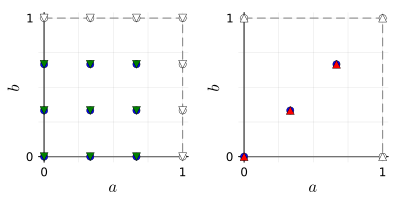

In [38]:
# compare <sz, tau> to <sy, tau>

tau = Symmetry(1,1,1,1//3, 1//3)
H1 = generategroup(sz, tau)
H2 = generategroup(sy, tau)

@show H1
@show H2
p1 = plotgroup(H1)
p2 = plotgroup(H2)

plot(p1, p2, size=(400,200))

## Verifying statements within paper

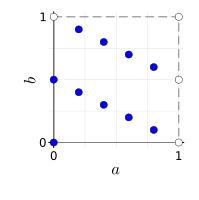

In [39]:
tau = Symmetry(1,1,1, 1//5, 9//10)

H = generategroup(tau)
plotgroup(H)

H = Symmetry[id, t(0//1, 1//3), t(0//1, 2//3), tx, t(1//2, 1//3), t(1//2, 2//3)]


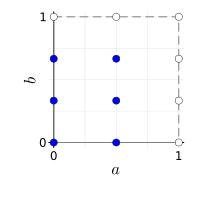

In [40]:
tab = Symmetry(1,1,1, 1//2, 1//3)
H = generategroup(tab)
@show H
plotgroup(H)

In [41]:
for k in 0:5
    @show k, tab^k
end

(k, tab ^ k) = (0, id)
(k, tab ^ k) = (1, t(1//2, 1//3))
(k, tab ^ k) = (2, t(0//1, 2//3))
(k, tab ^ k) = (3, tx)
(k, tab ^ k) = (4, t(0//1, 1//3))
(k, tab ^ k) = (5, t(1//2, 2//3))


In [42]:
# for text exemplifying an entry in Table 1
H1 = generategroup(sz, sy)
H2 = generategroup(sz*tz, sy)

@show H1
@show H2

@show isminimal(H1)
@show isminimal(H2)

@show inv(tz4)*H2*tz4 == H1
@show equivalent(H1,H2)

H1 = Symmetry[id, sz, sy, syz]
H2 = Symmetry[id, sztz, sy, syztz]
isminimal(H1) = true
isminimal(H2) = true
inv(tz4) * H2 * tz4 == H1 = true
equivalent(H1, H2) = true


true

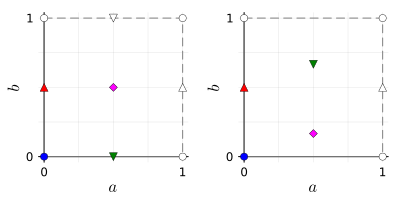

In [43]:
# plots of a group and its conjugate

H1 = generategroup(sz*tx, sy*tz)
H2 = conjugate(tz3, H1)
plot(plotgroup(H1), plotgroup(H2), size=(400,200))

G = Symmetry[id, tz, t(1//6, 1//4), t(1//6, 3//4), t(1//3, 0//1), t(1//3, 1//2), t(1//2, 1//4), t(1//2, 3//4), t(2//3, 0//1), t(2//3, 1//2), t(5//6, 1//4), t(5//6, 3//4)]
length(G) = 12
isminimal(G) = false


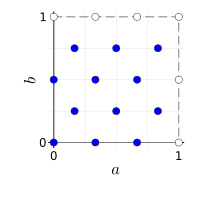

In [44]:
# example 
tab = Symmetry(1,1,1, 5//6, 1//4)
G = generategroup(tab)

@show G
@show length(G)
@show isminimal(G)
plotgroup(G)

In [45]:
t = [sytab^i * sz^j * sytab^k * sz^l for i in 0:3, j in 0:1, k in 0:3, l in 0:1]

LoadError: UndefVarError: `sytab` not defined

In [46]:
unique(sort(reshape(t, (64))))

LoadError: UndefVarError: `t` not defined

In [47]:
t = [sz^j*sytab^i for i in 0:3, j in 0:1]

LoadError: UndefVarError: `sytab` not defined

In [48]:
sort(reshape(t, (8)))

LoadError: UndefVarError: `t` not defined

G = Symmetry[id, sytxz]
length(G) = 2
isminimal(G) = true


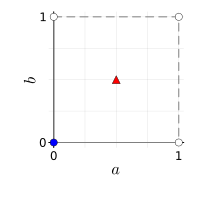

In [49]:
# example fiz.A, shows sztx, sy tau(a,b), a = 0, 1/4, 1/2, 3/4 => H minimal = Symmetry(1,1,-1, 0, 0)
g = Symmetry(1,-1,1, 1//2, 1//2)
G = generategroup(g)

@show G
@show length(G)
@show isminimal(G)
plotgroup(G)

In [50]:
P = Vector{Vector{Group}}(undef, 5)
P[1] = [[id]]
P[2] = Vector{Group}(undef, 15)

k = 0
for i in 1:16
    if Gppf16[i] ∉ [id; tx; tz]
        k += 1
        P[2][k] = [id; Gppf16[i]]
    end
end
P[2] = sort(unique(P[2][1:k]))

13-length equivalence class
{id, txz}
{id, sz}
{id, sztz}
{id, sztx}
{id, sztxz}
{id, sy}
{id, sytz}
{id, sytx}
{id, sytxz}
{id, syz}
{id, syztz}
{id, syztx}
{id, syztxz}


In [51]:
# Construct remaining $P_{n+1}$s from $P_n$ inductively
for n=3:5
    Pn = Vector{Group}(undef, length(P[n-1])^2)
    k = 0
    for i in 1:length(P[n-1])
        for j in 1:length(P[n-1])
            PiPj = P[n-1][i] * P[n-1][j] 
            if length(PiPj) == 2^(n-1) 
                k += 1
                Pn[k] = PiPj 
            end
        end
    end
    P[n] = sort(unique(Pn[1:k]))
end


# Let $Q_n$ be the set of order $2^n$ subgroups that don't contain isolated tx, tz elements.
Q = Vector{Vector{Group}}(undef, 5)

for n in 1:5
    k = 0
    Qn = Vector{Group}(undef, length(P[n]))
    for i in 1:length(P[n])
        if tx ∉ P[n][i] && tz ∉ P[n][i]
            k += 1
            Qn[k] = P[n][i]
        end
    end
    Q[n] = Qn[1:k]
end  

In [52]:
P[3]

34-length equivalence class
{id, tz, sz, sztz}
{id, tz, sztx, sztxz}
{id, tz, sy, sytz}
{id, tz, sytx, sytxz}
{id, tz, syz, syztz}
{id, tz, syztx, syztxz}
{id, tx, sz, sztx}
{id, tx, sztz, sztxz}
{id, tx, sy, sytx}
{id, tx, sytz, sytxz}
{id, tx, syz, syztx}
{id, tx, syztz, syztxz}
{id, txz, sz, sztxz}
{id, txz, sztz, sztx}
{id, txz, sy, sytxz}
{id, txz, sytz, sytx}
{id, txz, syz, syztxz}
{id, txz, syztz, syztx}
{id, sz, sy, syz}
{id, sz, sytz, syztz}
{id, sz, sytx, syztx}
{id, sz, sytxz, syztxz}
{id, sztz, sy, syztz}
{id, sztz, sytz, syz}
{id, sztz, sytx, syztxz}
{id, sztz, sytxz, syztx}
{id, sztx, sy, syztx}
{id, sztx, sytz, syztxz}
{id, sztx, sytx, syz}
{id, sztx, sytxz, syztz}
{id, sztxz, sy, syztxz}
{id, sztxz, sytz, syztx}
{id, sztxz, sytx, syztz}
{id, sztxz, sytxz, syz}


In [53]:
Q[3]

22-length equivalence class
{id, txz, sz, sztxz}
{id, txz, sztz, sztx}
{id, txz, sy, sytxz}
{id, txz, sytz, sytx}
{id, txz, syz, syztxz}
{id, txz, syztz, syztx}
{id, sz, sy, syz}
{id, sz, sytz, syztz}
{id, sz, sytx, syztx}
{id, sz, sytxz, syztxz}
{id, sztz, sy, syztz}
{id, sztz, sytz, syz}
{id, sztz, sytx, syztxz}
{id, sztz, sytxz, syztx}
{id, sztx, sy, syztx}
{id, sztx, sytz, syztxz}
{id, sztx, sytx, syz}
{id, sztx, sytxz, syztz}
{id, sztxz, sy, syztxz}
{id, sztxz, sytz, syztx}
{id, sztxz, sytx, syztz}
{id, sztxz, sytxz, syz}


In [54]:
Q[3][1]

order-4 group {id, txz, sz, sztxz}


In [55]:
H1 = [id; sz; tx*tz; sz*tx*tz]

order-4 group {id, sz, txz, sztxz}


In [56]:
H2 = [id; sz*tz; tx*tz; sz*tx]

order-4 group {id, sztz, txz, sztx}


In [57]:
tz4 * H1 * inv(tz4)

order-4 group {id, sztz, txz, sztx}


In [58]:
tz4 * H1 * inv(tz4) == H2

true